In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [139]:
Odata = pd.read_csv("outsidedata.csv")
Odata

,Time,PM10,PM25,PM100,Temperature,Gas,Humidity,Pressure,Altitude
0,1.707957e+09,0,0,0,33.9,315852,100.0,698.528,3029.24
1,1.707957e+09,0,0,0,26.8,39393,40.5,1004.702,71.41
2,1.707957e+09,0,0,0,26.9,53599,40.5,1004.704,71.40
3,1.707957e+09,0,0,0,26.9,69720,40.4,1004.705,71.39
4,1.707957e+09,0,0,0,26.9,85904,40.3,1004.710,71.35
...,...,...,...,...,...,...,...,...,...
549,1.707957e+09,0,0,0,23.3,391367,49.4,1004.710,71.35
550,1.707957e+09,0,0,0,23.4,393193,49.3,1004.714,71.31
551,1.707957e+09,0,0,0,23.4,391822,49.2,1004.724,71.23
552,1.707957e+09,0,0,0,23.4,392506,49.1,1004.722,71.24


In [140]:
Idata = pd.read_csv("insidedata.csv")
Idata

,Time,PM10,PM25,PM100,Temperature,Gas,Humidity,Pressure,Altitude
0,1.707955e+09,0,1,2,33.9,141926,100.0,698.528,3029.24
1,1.707955e+09,0,1,2,27.0,42314,40.9,1004.856,70.12
2,1.707955e+09,0,1,2,27.0,54782,40.9,1004.850,70.17
3,1.707955e+09,0,0,1,27.0,66531,40.7,1004.844,70.22
4,1.707955e+09,0,0,1,27.1,76830,40.6,1004.843,70.23
...,...,...,...,...,...,...,...,...,...
292,1.707955e+09,0,0,0,27.2,339787,39.8,1004.845,70.21
293,1.707955e+09,0,0,0,27.2,339787,39.8,1004.845,70.22
294,1.707955e+09,0,0,0,27.2,340834,39.7,1004.864,70.05
295,1.707955e+09,0,0,0,27.2,341536,39.7,1004.879,69.93


In [141]:
#mask off first bad data point for inside
first_mask = Idata['Humidity'] < 100
Idata = Idata[first_mask]

#mask off first bad data point for outside
first_mask = Odata["Humidity"] < 100
Odata = Odata[first_mask]

#mask off the outside data to be 297 rows
diff = 553 - 297
print(diff)
middle = int(diff/2)

#I want the midle 297 to account for travel time with the sensor
values = range(middle + 1, (554 - middle) - 1)
values = list(values)
#print(values)
Odata = Odata.iloc[values]
Odata

256


,Time,PM10,PM25,PM100,Temperature,Gas,Humidity,Pressure,Altitude
130,1.707957e+09,0,0,0,21.5,399246,47.2,1003.557,81.01
131,1.707957e+09,0,0,0,21.5,397832,47.3,1003.560,80.99
132,1.707957e+09,0,0,0,21.4,397129,47.4,1003.557,81.01
133,1.707957e+09,0,0,0,21.4,401146,47.6,1003.554,81.04
134,1.707957e+09,0,0,0,21.3,403305,47.7,1003.554,81.04
...,...,...,...,...,...,...,...,...,...
421,1.707957e+09,0,0,1,16.8,480631,62.7,1003.637,80.34
422,1.707957e+09,0,0,1,16.8,479606,62.6,1003.631,80.40
423,1.707957e+09,0,0,1,16.8,479265,62.5,1003.629,80.41
424,1.707957e+09,0,0,1,16.8,479265,62.4,1003.627,80.43


In [143]:
#reset indices of both data frames
Odata.reset_index(inplace=True)
Odata

,index,Time,PM10,PM25,PM100,Temperature,Gas,Humidity,Pressure,Altitude
0,130,1.707957e+09,0,0,0,21.5,399246,47.2,1003.557,81.01
1,131,1.707957e+09,0,0,0,21.5,397832,47.3,1003.560,80.99
2,132,1.707957e+09,0,0,0,21.4,397129,47.4,1003.557,81.01
3,133,1.707957e+09,0,0,0,21.4,401146,47.6,1003.554,81.04
4,134,1.707957e+09,0,0,0,21.3,403305,47.7,1003.554,81.04
...,...,...,...,...,...,...,...,...,...,...
291,421,1.707957e+09,0,0,1,16.8,480631,62.7,1003.637,80.34
292,422,1.707957e+09,0,0,1,16.8,479606,62.6,1003.631,80.40
293,423,1.707957e+09,0,0,1,16.8,479265,62.5,1003.629,80.41
294,424,1.707957e+09,0,0,1,16.8,479265,62.4,1003.627,80.43


In [144]:
Idata.reset_index(inplace=True)
Idata

,index,Time,PM10,PM25,PM100,Temperature,Gas,Humidity,Pressure,Altitude
0,1,1.707955e+09,0,1,2,27.0,42314,40.9,1004.856,70.12
1,2,1.707955e+09,0,1,2,27.0,54782,40.9,1004.850,70.17
2,3,1.707955e+09,0,0,1,27.0,66531,40.7,1004.844,70.22
3,4,1.707955e+09,0,0,1,27.1,76830,40.6,1004.843,70.23
4,5,1.707955e+09,0,0,1,27.1,85730,40.5,1004.843,70.23
...,...,...,...,...,...,...,...,...,...,...
291,292,1.707955e+09,0,0,0,27.2,339787,39.8,1004.845,70.21
292,293,1.707955e+09,0,0,0,27.2,339787,39.8,1004.845,70.22
293,294,1.707955e+09,0,0,0,27.2,340834,39.7,1004.864,70.05
294,295,1.707955e+09,0,0,0,27.2,341536,39.7,1004.879,69.93


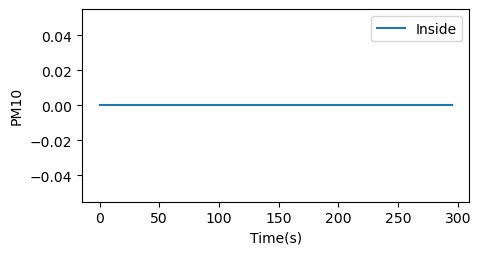

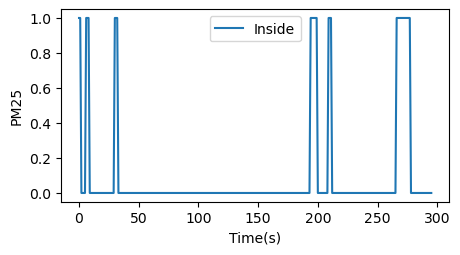

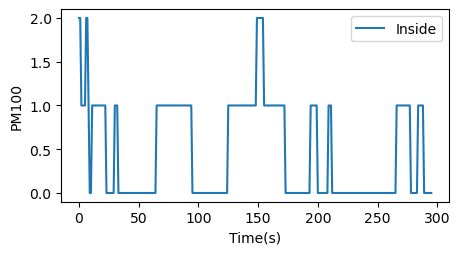

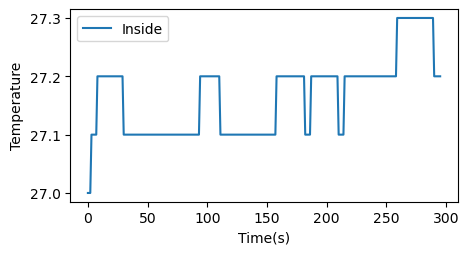

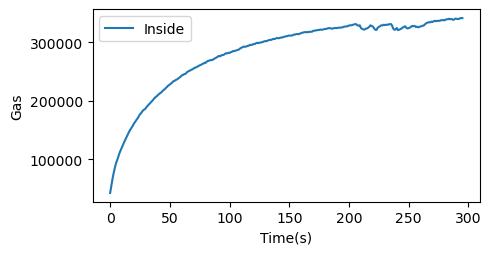

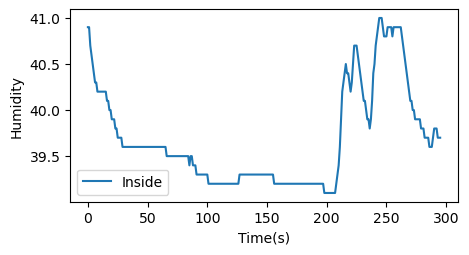

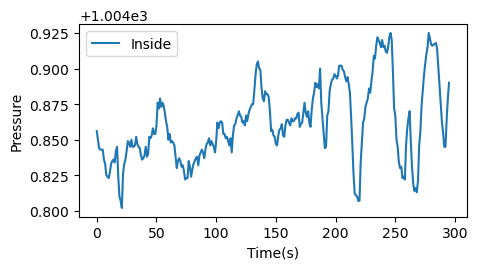

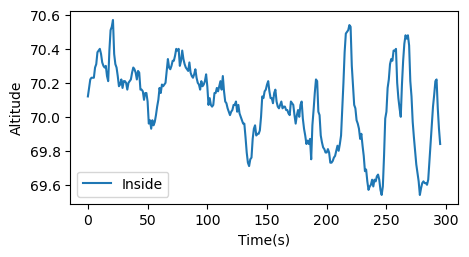

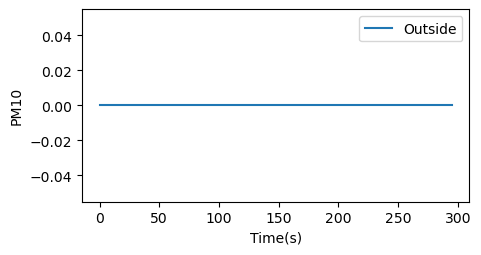

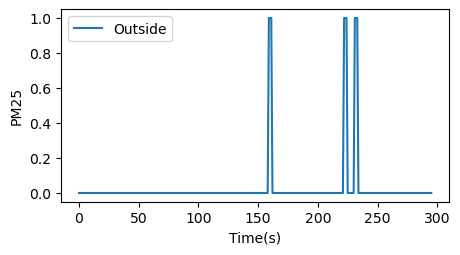

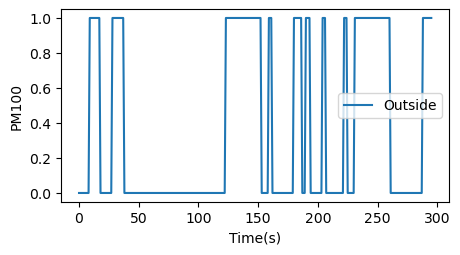

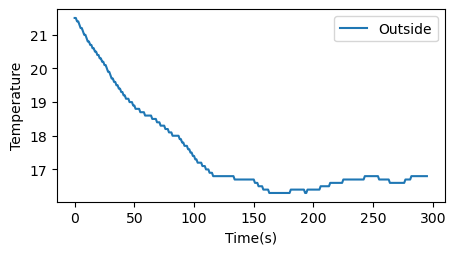

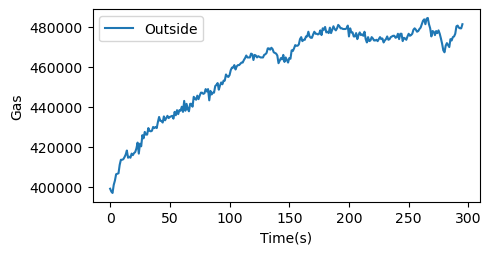

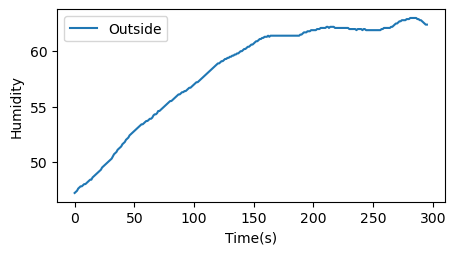

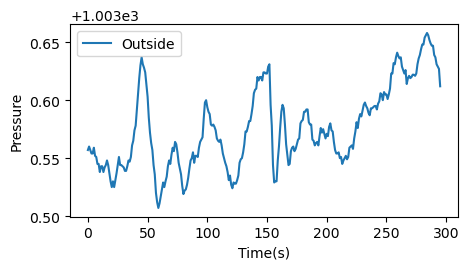

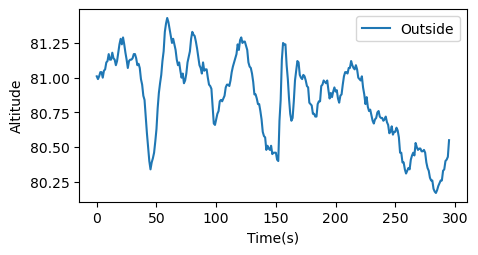

In [149]:
cols = ["PM10", "PM25", "PM100", "Temperature", "Gas", "Humidity", "Pressure", "Altitude"]
   
for i in range(0,8):    
    fig1 = plt.figure(i, figsize=(5,2.5))

    plt.plot(Idata[cols[i]], label = "Inside")
    
    plt.ylabel(cols[i])
    plt.xlabel("Time(s)")
    plt.legend()
    plt.show()
    
for i in range(0,8):    
    fig1 = plt.figure(i, figsize=(5,2.5))

    plt.plot(Odata[cols[i]], label = "Outside")
    
    plt.ylabel(cols[i])
    plt.xlabel("Time(s)")
    plt.legend()    
    plt.show()

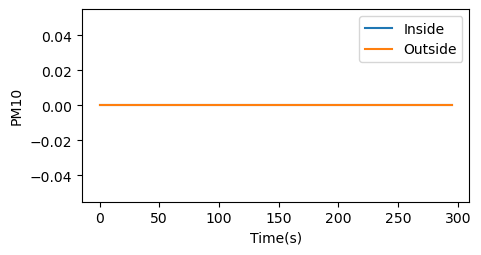

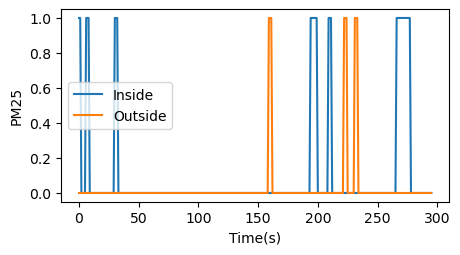

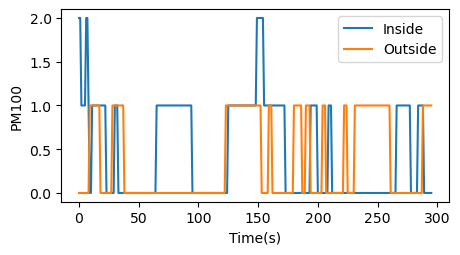

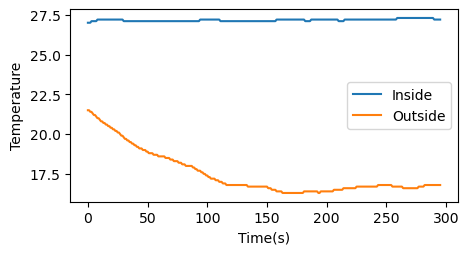

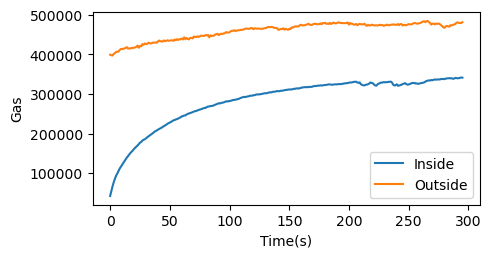

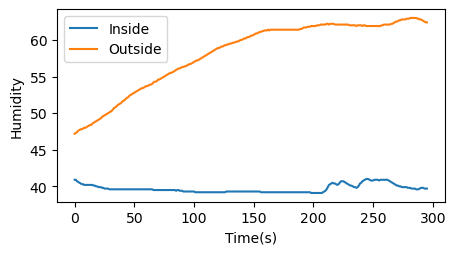

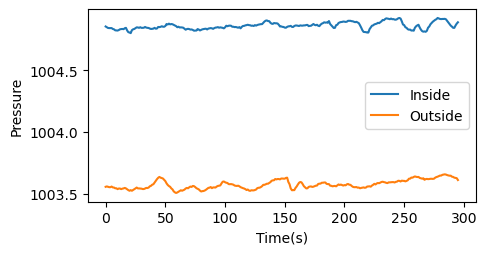

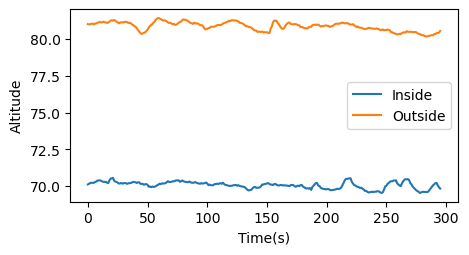

In [148]:
cols = ["PM10", "PM25", "PM100", "Temperature", "Gas", "Humidity", "Pressure", "Altitude"]
   
for i in range(0,8):    
    fig1 = plt.figure(i, figsize=(5,2.5))

    plt.plot(Idata[cols[i]], label = "Inside")
    plt.plot(Odata[cols[i]], label = "Outside")
    
    plt.ylabel(cols[i])
    plt.xlabel("Time(s)")
    plt.legend()
    plt.show()


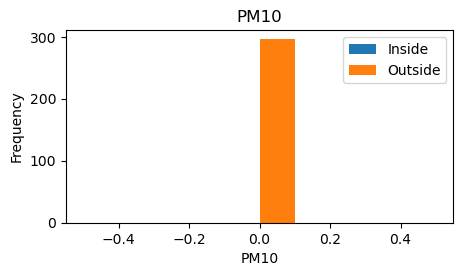

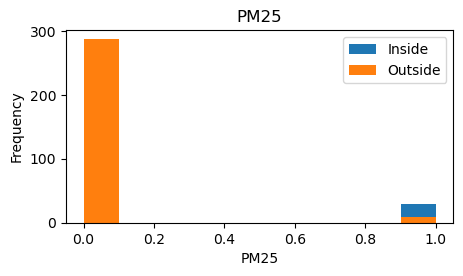

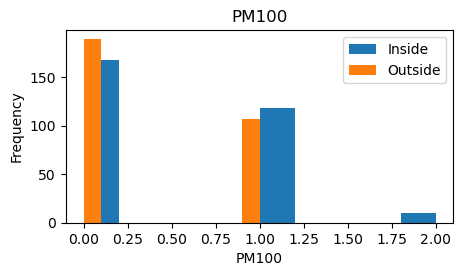

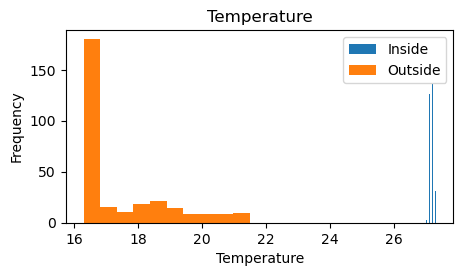

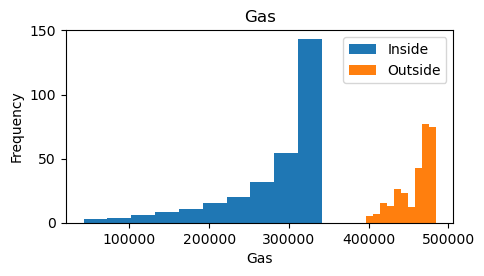

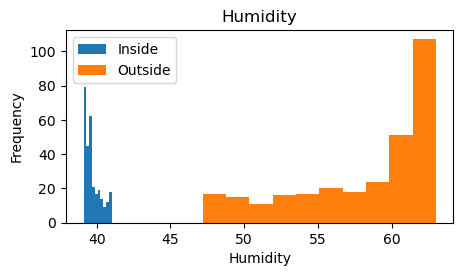

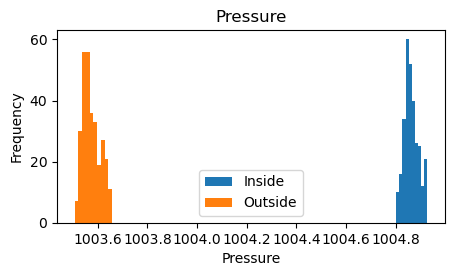

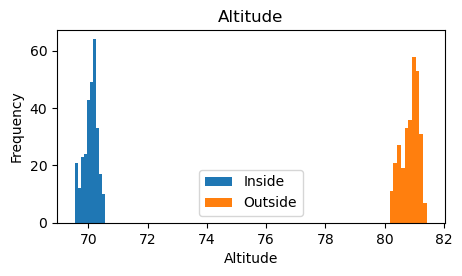

In [152]:
for i in range(0,8):    
    fig1 = plt.figure(i, figsize=(5,2.5))

    plt.hist(Idata[cols[i]], label = "Inside")
    plt.hist(Odata[cols[i]], label = "Outside")
    
    plt.ylabel("Frequency")
    plt.xlabel(cols[i])
    plt.title(cols[i])
    plt.legend()
    plt.show()

In [163]:
N = 295

for i in range(0,8):
    
        outside_col = Odata[cols[i]]
        inside_col = Idata[cols[i]]

        #find mean uncertainty of each
        mean_inside = round(np.mean(inside_col), 4)
        mean_outside= round(np.mean(outside_col), 4)

        std_inside = round(np.std(inside_col), 4)
        std_outside = round(np.std(outside_col), 4)
        
        print(cols[i])
        print(f"Inside: The mean for {cols[i]} inside is {mean_inside}. The std for {cols[i]} inside is {std_inside}")
        print(f"Outside: The mean for {cols[i]} outside is {mean_outside}. The std for {cols[i]} outside is {std_outside}")
        
        N = len(Odata)
        
        std_mean_inside = std_inside / (N)**(1/2)
        std_mean_outside = std_outside / (N)**(1/2)
        
        #use smaller derivation on the mean
        std_mean_using = min(std_mean_outside, std_mean_inside)
        
        mean_diff = abs(mean_outside - mean_inside)
        
        stds_away = round(mean_diff / std_mean_using, 2)
        
        print(f"The mean uncertainty is {round(std_mean_using,4)}")
        print(f"Our inside and outside {cols[i]} measurements are seperated by {stds_away}" + " sigma")
        print("")
    

PM10
Inside: The mean for PM10 inside is 0.0. The std for PM10 inside is 0.0
Outside: The mean for PM10 outside is 0.0. The std for PM10 outside is 0.0
The mean uncertainty is 0.0
Our inside and outside PM10 measurements are seperated by nan sigma

PM25
Inside: The mean for PM25 inside is 0.098. The std for PM25 inside is 0.2973
Outside: The mean for PM25 outside is 0.0304. The std for PM25 outside is 0.1717
The mean uncertainty is 0.01
Our inside and outside PM25 measurements are seperated by 6.77 sigma

PM100
Inside: The mean for PM100 inside is 0.4662. The std for PM100 inside is 0.5625
Outside: The mean for PM100 outside is 0.3615. The std for PM100 outside is 0.4804
The mean uncertainty is 0.0279
Our inside and outside PM100 measurements are seperated by 3.75 sigma

Temperature
Inside: The mean for Temperature inside is 27.1659. The std for Temperature inside is 0.0674
Outside: The mean for Temperature outside is 17.5051. The std for Temperature outside is 1.3833
The mean uncertai

C:\Users\User\AppData\Local\Temp\ipykernel_10148\918032648.py:29: RuntimeWarning: invalid value encountered in double_scalars
  stds_away = round(mean_diff / std_mean_using, 2)
